#                                         MT-Cars Analysis              

# Data information 
This is my github repo:
https://github.com/VineelaNedunuri/Statistiska_metoder-vineela-nedunuri/blob/main/Uppgift/Overall%20analysis.ipynb

The data we are using here is auto mpg data set which obtained in 1963 from the American Statistical Association.it describes various engine parameters related to fuel consumption in various car models from 1970-1982.

Importing libraries : 
NumPy, Pandas, Matplotlib, Seaborn and SciPy libraries are used to explore the dataset. 

In [82]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs 
import seaborn as sns 

from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols


# Loading the data
We import a dataset for analysis with name auto-mpg.csv 

In [83]:
# import cars data
filepath = '../Uppgift/Data/auto-mpg.csv' # to read the file path
cars = pd.read_csv(filepath) # convert to dataframe
cars.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [84]:
cars.shape # shows the number of rows and columns are present in data

(398, 9)

The number of instances and attributes in dataset are 398 and 9

In [85]:
cars.columns # shows the names of columns present in data

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Description of total number of columns present in dataset.  
- mpg : Miles or mileage per gallon which represents the fuel consumption of car.
- cylinders: Contains the number of cyinders present in car where fuel is combusted to generate the power.
- displacement: Overall volume of air displased by the engine (cubic inches).
- horsepower: Indicates the power of engine (horsepower).
- weight: Gross weight of car (pounds).
- acceleration: increasing speed- time to go 0-60 mph(seconds).
- model_year: year of the car model.
- origin: country of manufacture of car.
- name: Name of the car- model designati

In [86]:
cars.info() # show the basic inforamtion of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [87]:
cars.isnull().sum() # To find the missing value in the data 

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [88]:
# From above dataset there are 6 NAN values are present in horsepower.
cars = cars.dropna() # Pick out rows that contain NaN
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# Descriptive statistics

The function named describe() shows the basic summary of statastics for each column.

In [89]:
cars_stat= cars.loc[:, 'mpg':'acceleration'] # picks the particular columns 
cars_stat.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5


In [90]:
cars_stat.describe().apply(lambda x:x.apply('{0:.2f}'.format)).T # Calculate descriptive metrics in Pandas

,count,mean,std,min,25%,50%,75%,max
mpg,392.00,23.45,7.81,9.00,17.00,22.75,29.00,46.60
cylinders,392.00,5.47,1.71,3.00,4.00,4.00,8.00,8.00
displacement,392.00,194.41,104.64,68.00,105.00,151.00,275.75,455.00
horsepower,392.00,104.47,38.49,46.00,75.00,93.50,126.00,230.00
weight,392.00,2977.58,849.40,1613.00,2225.25,2803.50,3614.75,5140.00
acceleration,392.00,15.54,2.76,8.00,13.78,15.50,17.02,24.80


###  What is the average fuel efficiency of cars in the data?

Mean is the average of a data set, i.e. the sum of all values ​​divided by how many values ​​are in the data set.

${\bar x}=\frac{1}{n}\sum_{i=1}^{n}x_i=\frac{x_1+\dots+x_n}{n}$

In [91]:
mean = cars['mpg'].mean() # calculate mean using Pandas
print(f'The average fuel efficiency of cars in the data : {mean} mpg') # print the mean value

The average fuel efficiency of cars in the data : 23.445918367346938 mpg


### Which country manufactured more number of cars in the data?

Mode is the value that appears more frequently in our dataset.We can calculate mode in Pandas through the function  <code>.mode()</code>

In [92]:
country = cars['origin'].mode() # calculate mode using Pandas
print(f'Most number of cars are manufactured in the data : \n', country) # print the result

Most number of cars are manufactured in the data : 
 0    usa
Name: origin, dtype: object


### Lets investigate the distribution on each column of the data
Let's make a histogram of the selected columns in our dataset.A graphical way to examine skewness is to compare the mean with the median.
- If the mean is greater than the median, the distribution is skewed to the right. 

- If the mean is less than the median, the distribution is skewed to the left.


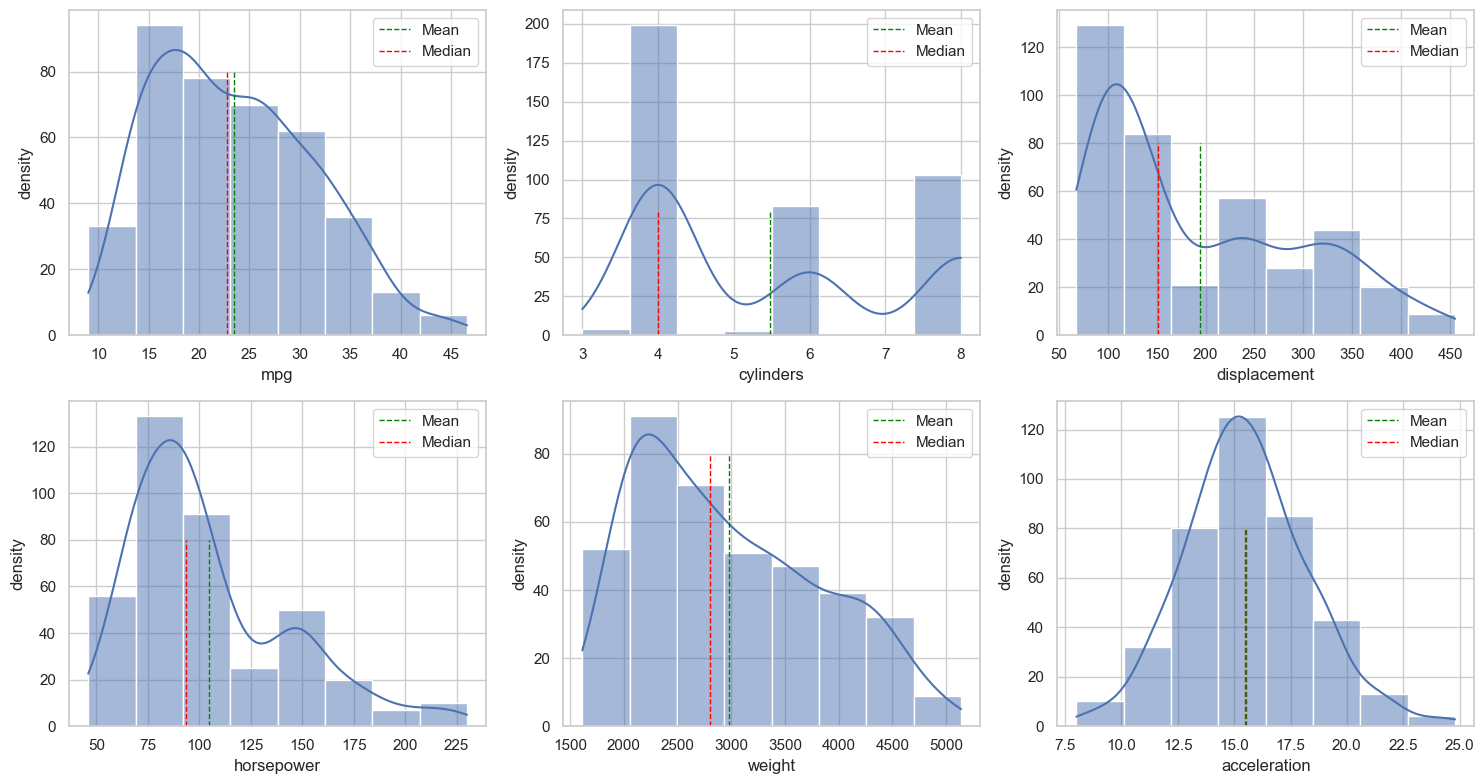

In [93]:
### Grundplot
fig = plt.figure(figsize=(15,8)) #  shows the figure size

for i, col in enumerate(cars_stat.columns):
    

    ax=plt.subplot(2,3,i+1) # represents subplots two row with four column
    sns.histplot(cars_stat,x= col,bins=8, kde=True) # plot hitogram plot with 8 bins 
    
    ### Mean och median
    mean = cars_stat[col].mean() # calculate mean for cars sats data
    median = cars_stat[col].median() # calculate median for cars sats data
    ax.plot([mean, mean], [0, 80], color='green', linestyle='--', linewidth=1, label='Mean') # Plot mean value of car_stat with dashed green line
    ax.plot([median, median], [0, 80], color='red', linestyle='--', linewidth=1, label='Median') # Plot median value of car_stat with dashed gred line
    ax.set_xlabel(col)
    ax.set_ylabel("density")
    
    ### Legend
    leg = ax.legend(loc='upper right') # Draw legend for mean and median in upper right corner
fig.tight_layout()
plt.show()

- For mpg , cylinders,displacement,horsepower, weight the mean is greater than the median so the distribution is thus skewed to the right, and should have a positive skewness value.So small number of cars have high amount of horsepower, high weight, high displacement values.

- Most of the cars in the data has 4 cylinders.

- The acceleration of the cars in the data is normally distributed.


Skewness:

skewness = 0: normally distributed

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution. 

In [94]:
skewness = scs.skew(cars_stat)
skewness

array([0.45534138, 0.50616287, 0.69898128, 1.08316116, 0.51759535,
       0.29046997])

### How does the year of cars manufacture in different countries impacts its fuel efficiency?

In [95]:
car_model = cars.groupby(by=['model_year','origin'])[['mpg']].mean().reset_index() # calculate average mpg value for each model 
car_model.head()

,model_year,origin,mpg
0,70,europe,25.200000
1,70,japan,25.500000
2,70,usa,15.272727
3,71,europe,28.750000
4,71,japan,29.500000


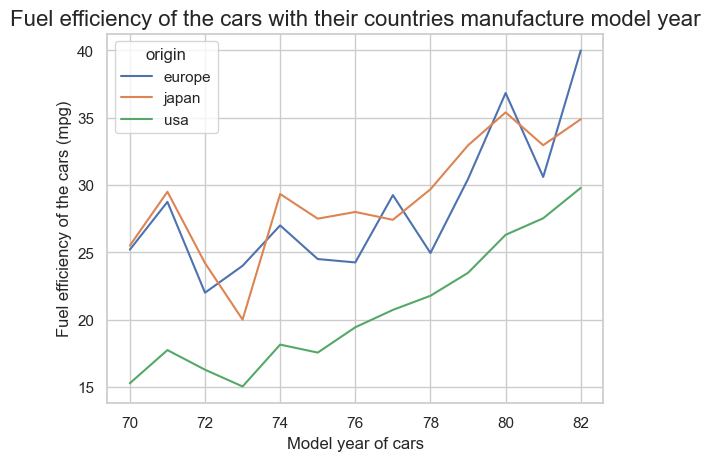

In [96]:
# Plot the graph that relates the countries of cars with their manufacture year how it effects fuel efficiency

model_plot=sns.lineplot( data = car_model,x="model_year", y="mpg",hue="origin") # Plot model year of cars aganist efficency of fuel with lineplot
model_plot.set_title("Fuel efficiency of the cars with their countries manufacture model year",fontsize=16) # To set the tittle 
 
model_plot.set_xlabel("Model year of cars", fontsize=12) # set x label to model of cars
 
model_plot.set_ylabel("Fuel efficiency of the cars (mpg)",fontsize=12) # set y label to mpg
plt.show()

Data contains three countires that manufacture the cars in the year 1970-1982.
- Fuel efficiency of the cars manufactured by USA are always less compared to other two countries

- Japan cars has greater fuel efficiency than Europe on the begining and also have slight ups and downs on their manufacture.

- Europe has more ups and downs but has more fuel efficiency on 1982.

So cars that are manufactured in the year 1982 have better fuel efficiency than in the year 1970.


### How does number of cylinders in cars affects its fuel efficiency?

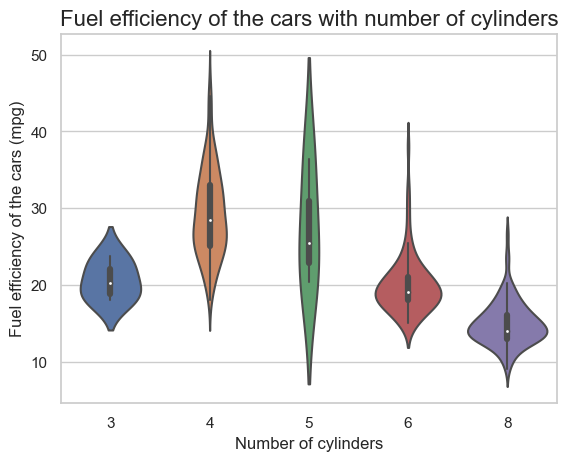

In [97]:
sns.set(style = 'whitegrid') # use to set style of background of plot
ax = sns.violinplot(x="cylinders", y="mpg", data=cars)
ax.set_title("Fuel efficiency of the cars with number of cylinders",fontsize=16) # To set the tittle 
 
ax.set_xlabel("Number of cylinders", fontsize=12) # set x label to no. of car cylinders
 
ax.set_ylabel("Fuel efficiency of the cars (mpg)",fontsize=12) # set y label to mpg
plt.show()

- The average fuel efficiency of cars is more for cars with 4 cylinders.

## Confidence interval 

### what is the 95% confidence interval for average fuel effiency of cars with 4 cylinders?

In [98]:
from scipy.stats import t # Import the t-distribution from SciPy

cylinder4 = cars.query('cylinders == 4') # subset data for 4 cylinders cars
cylinder4.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510


In [99]:
mean = np.mean(cylinder4['mpg']) # Calculate the sample mean
std = np.std(cylinder4['mpg'], ddof=1) # Calculate the sample standard deviation
n = len(cylinder4['mpg']) # Calculate n for the sample

alpha = 0.05 # Set significance level
t_crit = t.ppf(1-alpha/2, n-1) # Calculate critical t-value
sem = std / np.sqrt(n) # Calculate the standard error of the mean 

upper = mean - t_crit * sem # Calculate below limit
lower = mean + t_crit * sem # Calculate upper limit
round(upper, 1), round(lower, 1) # Rounding to 1 decimal place
print('Result: ' + str(round(mean,1)) + ' \u00B1 ' + str(round(t_crit*sem,1))) # print confidenceinterval
print(f'Confidence interval (\u03B1=0.05) for average fuel efficiency of cars with 4 cylinders : [{round(upper,1)} {round(lower,1)}]') # Printa konfidensintervall


Result: 29.3 ± 0.8
Confidence interval (α=0.05) for average fuel efficiency of cars with 4 cylinders : [28.5 30.1]


- So 95% confidence interval for average fuel efficiency of cars with 4 cylinders would be [28.5 30.1]

### what is the 90% confidence interval for the difference in weight between cars with 4 cylinders and cars with 8 cylinders?

If the populations standard deviation is equal then konfidence interval for $\mu_{1}$- $\mu_{2}$  

$(\bar{x_1} - \bar{x_2})\pm t_{\alpha/2, {df}}{\sqrt{\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2}}}$

$s_{p} = {\sqrt{\frac{({n_1}-1){s_1^2} + ({n_2}-1){s_2^2}}{({n_1}+{n_2}-2)}}}  $

If the populations standard deviation is not equal then konfidence interval for $\mu_{1}$- $\mu_{2}$  

$(\bar{x_1} - \bar{x_2})\pm t_{\alpha/2, {df}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$


- Assuming tha data of the population standard deviations are equal

In [100]:
cylinder_4 = cars[cars['cylinders'] == 4] # sort the data cars with 4 cylinders
cylinder_8 = cars[cars['cylinders'] == 8] # sort the data cars with 8 cylinders

n_1 = len(cylinder_4) #  Calculate n for the sample of cars with 4 cylinders 
n_2 = len(cylinder_8) # Calculate n for the sample of cars with 8 cylinders 

x_1 = np.mean(cylinder_4['weight']) # Calculate the sample 1 mean
s_1 = np.std(cylinder4['weight'], ddof=1) # Calculate the sample 1 standard deviation

x_2 = np.mean(cylinder_8['weight']) # Calculate the sample 2 mean
s_2 = np.std(cylinder_8['weight'], ddof=1) # Calculate the sample 2 standard deviation

alpha = 0.1 # Set significance level
df = n_1+n_2-2 # degree of fredom
t_crit = t.ppf(1-alpha/2, df ) # Calculate critical t-value

s_p = np.sqrt(((n_1-1)*s_1**2 + (n_2-1)*s_2**2)/(n_1+n_2-2)) # calculate standard deviation of two samples
sem = s_p * np.sqrt((1/n_1)+(1/n_2)) # Calculate the standard error of the mean

diff_mean = x_1-x_2 # calculate difference in mean
upper = diff_mean - t_crit * sem # Calculate below limit
lower = diff_mean + t_crit * sem # Calculate upper limit

print('Result: ' + str(round(diff_mean,1)) + ' \u00B1 ' + str(round(t_crit*sem,1))) # print confidenceinterval
print(f'Confidence interval (\u03B1=0.1) for the difference in weight between cars with 4 cylinders and cars with 8 cylinders : [{round(upper,1)} {round(lower,1)}]') # Printa konfidensintervall


Result: -1809.6 ± 76.5
Confidence interval (α=0.1) for the difference in weight between cars with 4 cylinders and cars with 8 cylinders : [-1886.2 -1733.1]


- So 90% confidence interval for the difference in weight between cars with 4 cylinders and cars with 8 cylinders would be [-1886.2 -1733.1]

## Hypothesis Test
$H_A: \mu_1 \neq  \mu_2$

$H_0: \mu_1 =  \mu_2$

Hypothesis test can be two sided, greater and lesser.


- $ |Test statistic| < Critical value $:Fail to reject null hypothesis.

- $ |Test statistic| \geq Critical value$:Reject null hypothesis.

- If $ p value \leq \alpha $  then the result would be reject null hypothesis.

- If $ p value > \alpha $  then the result would be fail to reject null hypothesis.

### Construct a hypothesis test that examines whether average fuel efficiency of all cars manufacutre in the year 1982 are same or different  (assume the population mean $\mu_0$ = 40 mpg). Use a significance level of $\alpha = 0.05$.

Alternative hypothesis : The average fuel efficiency of cars manufactured in the year 1982 is not equal to 40 mpg.

$H_A: \mu \neq 40\,mpg$

    
Null hypothesis : The average fuel efficiency of cars manufactured in the year 1982 is equal to 40 mpg.

$H_0: \mu = 40\,mpg$


Then, we calculate the test statistic for our null hypothesis, i.e.:

$t = \frac{\overline{X} - \mu_0}{s \,/\sqrt{n}}$

Since the population standard deviation is unknown, we will use a t-test here.

In [101]:
from scipy.stats import t # Import the t-distribution from SciPy
year = cars[cars['model_year'] == 82] # Data of cars manufactured in 1982
sample = year['mpg'] # Select the column mpg as sample

xbar = sample.mean() # Calculate sample mean
mu = 40 # Set mu as the value for the null hypothesis
std = sample.std(ddof=1) # calculate the sample standard deviation
n = len(sample) # calculate the size of the sample
alpha = 0.05

statistic = (xbar - mu) / (std / np.sqrt(n)) # Calculate the value of the test statistic
print('Test statistic: ' +str(statistic)) # Print the test statistics


t_crit = t.ppf(1-alpha/2, n-1) # Calculate the value of the critical statistic
print('Critical statistic: ' +str(t_crit)) # Print the critical statistics

if abs(statistic) < t_crit: #  To check condition of test result
    print("Fail to reject the null hypothesis, mean value is same")
else:
    print("Reject the null hypothesis, mean value is different")

Test statistic: -8.374123511411977
Critical statistic: 2.045229642132703
Reject the null hypothesis, mean value is different


$ |Test statistic| = 8.374 \geq Critical value =2.045 $: So we reject null hypothesis  $ H_0.$ with significance level of $\alpha = 0.05$ and average fuel efficiency of all cars manufacutre in the year 1982 are different.

We use the built-in function ttest_1samp(), which calculates the t-test statistic and its p-value given a set of data and a population mean. Here we use alternative='two-sided', which gives us the two-sided test that our sample mean is different from the population mean.

In [102]:
result,pvalue= scs.ttest_1samp(a=sample, popmean=mu, alternative='two-sided') # Carry out two-sided t-test including ttest_1samp() in SciPy

print(result,pvalue) # Print the result

if pvalue > alpha:# To check condition of test result
    print("Fail to reject the null hypothesis, mean value is not equal to 40 mpg")
else:
    print("Reject the null hypothesis, mean value is equal to 40 mpg")

-8.374123511411977 3.1374935328662237e-09
Reject the null hypothesis, mean value is equal to 40 mpg


$ pvalue \leq \alpha $  so we the reject null hypothesis. So the result  would be the average fuel efficiency of cars manufactured in the year 1982 is not equal to 40 mpg.

## Construct a hypothesis test that examines whether more than one fourth of the cars with 4 cylinders are manufactured in USA. Use a significance value of $\alpha=0.1$

Alternative hypothesis: The Cars in data contain more than one fourth of the cars with 4 cylinders manufactured in USA.

$H_A: p > 1/4$

    
Null hypothesis :The Cars in data contain less than or equal one fourth of the cars with 4 cylinders manufactured in USA.

$H_0: p \leq 1/4$


Then we calculate the test statistic for our hypothesis, which is given by

$Z = \frac{\hat{p}-p_0}{\sqrt{p_0(1-p_0)/n}}$

For proportion tests, we use the default normal distribution Z, so we start by importing it from SciPy.
Here we use the proportions_ztest() test and we use alternative='larger', because our alternative hypothesis is that p is <strong>more</strong> than 1/2.


In [103]:
from statsmodels.stats import proportion # importing proportion from ststsmodel

cars_usa = cars[cars['origin'] == 'usa'] # Data of cars manufactured by usa.
usa_4 = cars_usa[cars_usa['cylinders'] == 4] # Data of cars with 4 cylinders manufactured by usa.

p_pop = 1/4 # proportion
n = len(cars_usa) # length of the cars with 4 cylinders manufactured by usa.

alpha = 0.1 # set the signifigance level.
statistic, pvalue = proportion.proportions_ztest(count=len(usa_4), nobs=len(cars_usa), value=p_pop, prop_var=p_pop, alternative='larger')
print('statistic :' + str(statistic))
print('pvalue :' + str(pvalue))

if pvalue > alpha:# To check condition of test result
    print("Fail to reject the null hypothesis")
else:
    print("Reject the null hypothesis")

statistic :1.1434522260231417
pvalue :0.12642543963172764
Fail to reject the null hypothesis


Since $p = 0.126 > \alpha=0.1$, we cannot reject the null hypothesis. This means that with a significance level of 0.1, we cannot say that more than one fourth of the cars with 4 cylinders manufactured in USA.

## Correlations analysis
- Correlation matrix 

In [104]:
corr = cars.corr(numeric_only= True) # to find the pairwise correlation of all columns in the Pandas Dataframe in Python
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


- Correlation plots

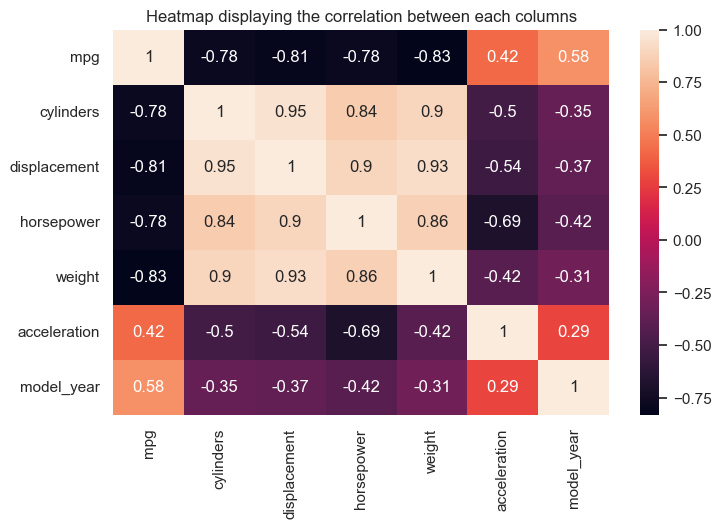

In [105]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True) # shows the data where each value of a matrix is represented as a color
plt.title('Heatmap displaying the correlation between each columns') # set tittle
plt.show()

The range of values for the correlation coefficient is -1.0 to 1.0.
- If value is -1.0 indicates a perfect negative correlation. 
- If value is 1.0 indicates a perfect positive correlation. 
- If the value is greater than zero, it is a positive relationship.
- If the value is less than zero, it is a negative relationship. 
- If the value is zero indicates that there is no relationship between the two variables.

<AxesSubplot: title={'center': 'Heatmap displaying the correlation between each columns'}>

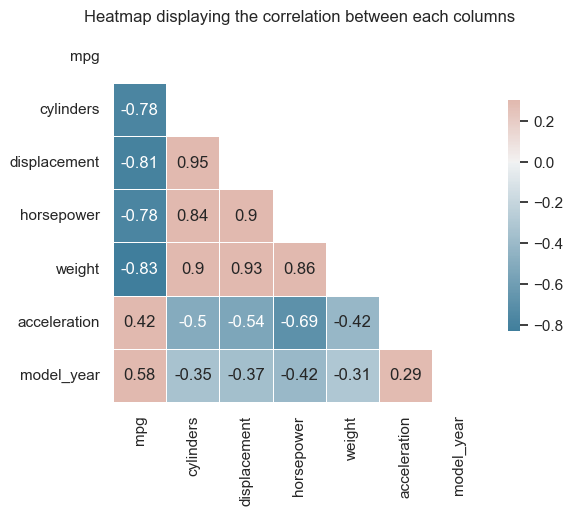

In [106]:
corr = cars.corr(numeric_only=True) # correlation between each columns
mask = np.triu(np.ones_like(corr, dtype=bool)) # mask the repeated values 

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# set tittle
plt.title('Heatmap displaying the correlation between each columns')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- There are positive correlations between cylinders,horsepower,weight and displacement.

- There are negative correlations between mpg with cylinders,horsepower,weight and displacement. 


<Figure size 300x300 with 0 Axes>

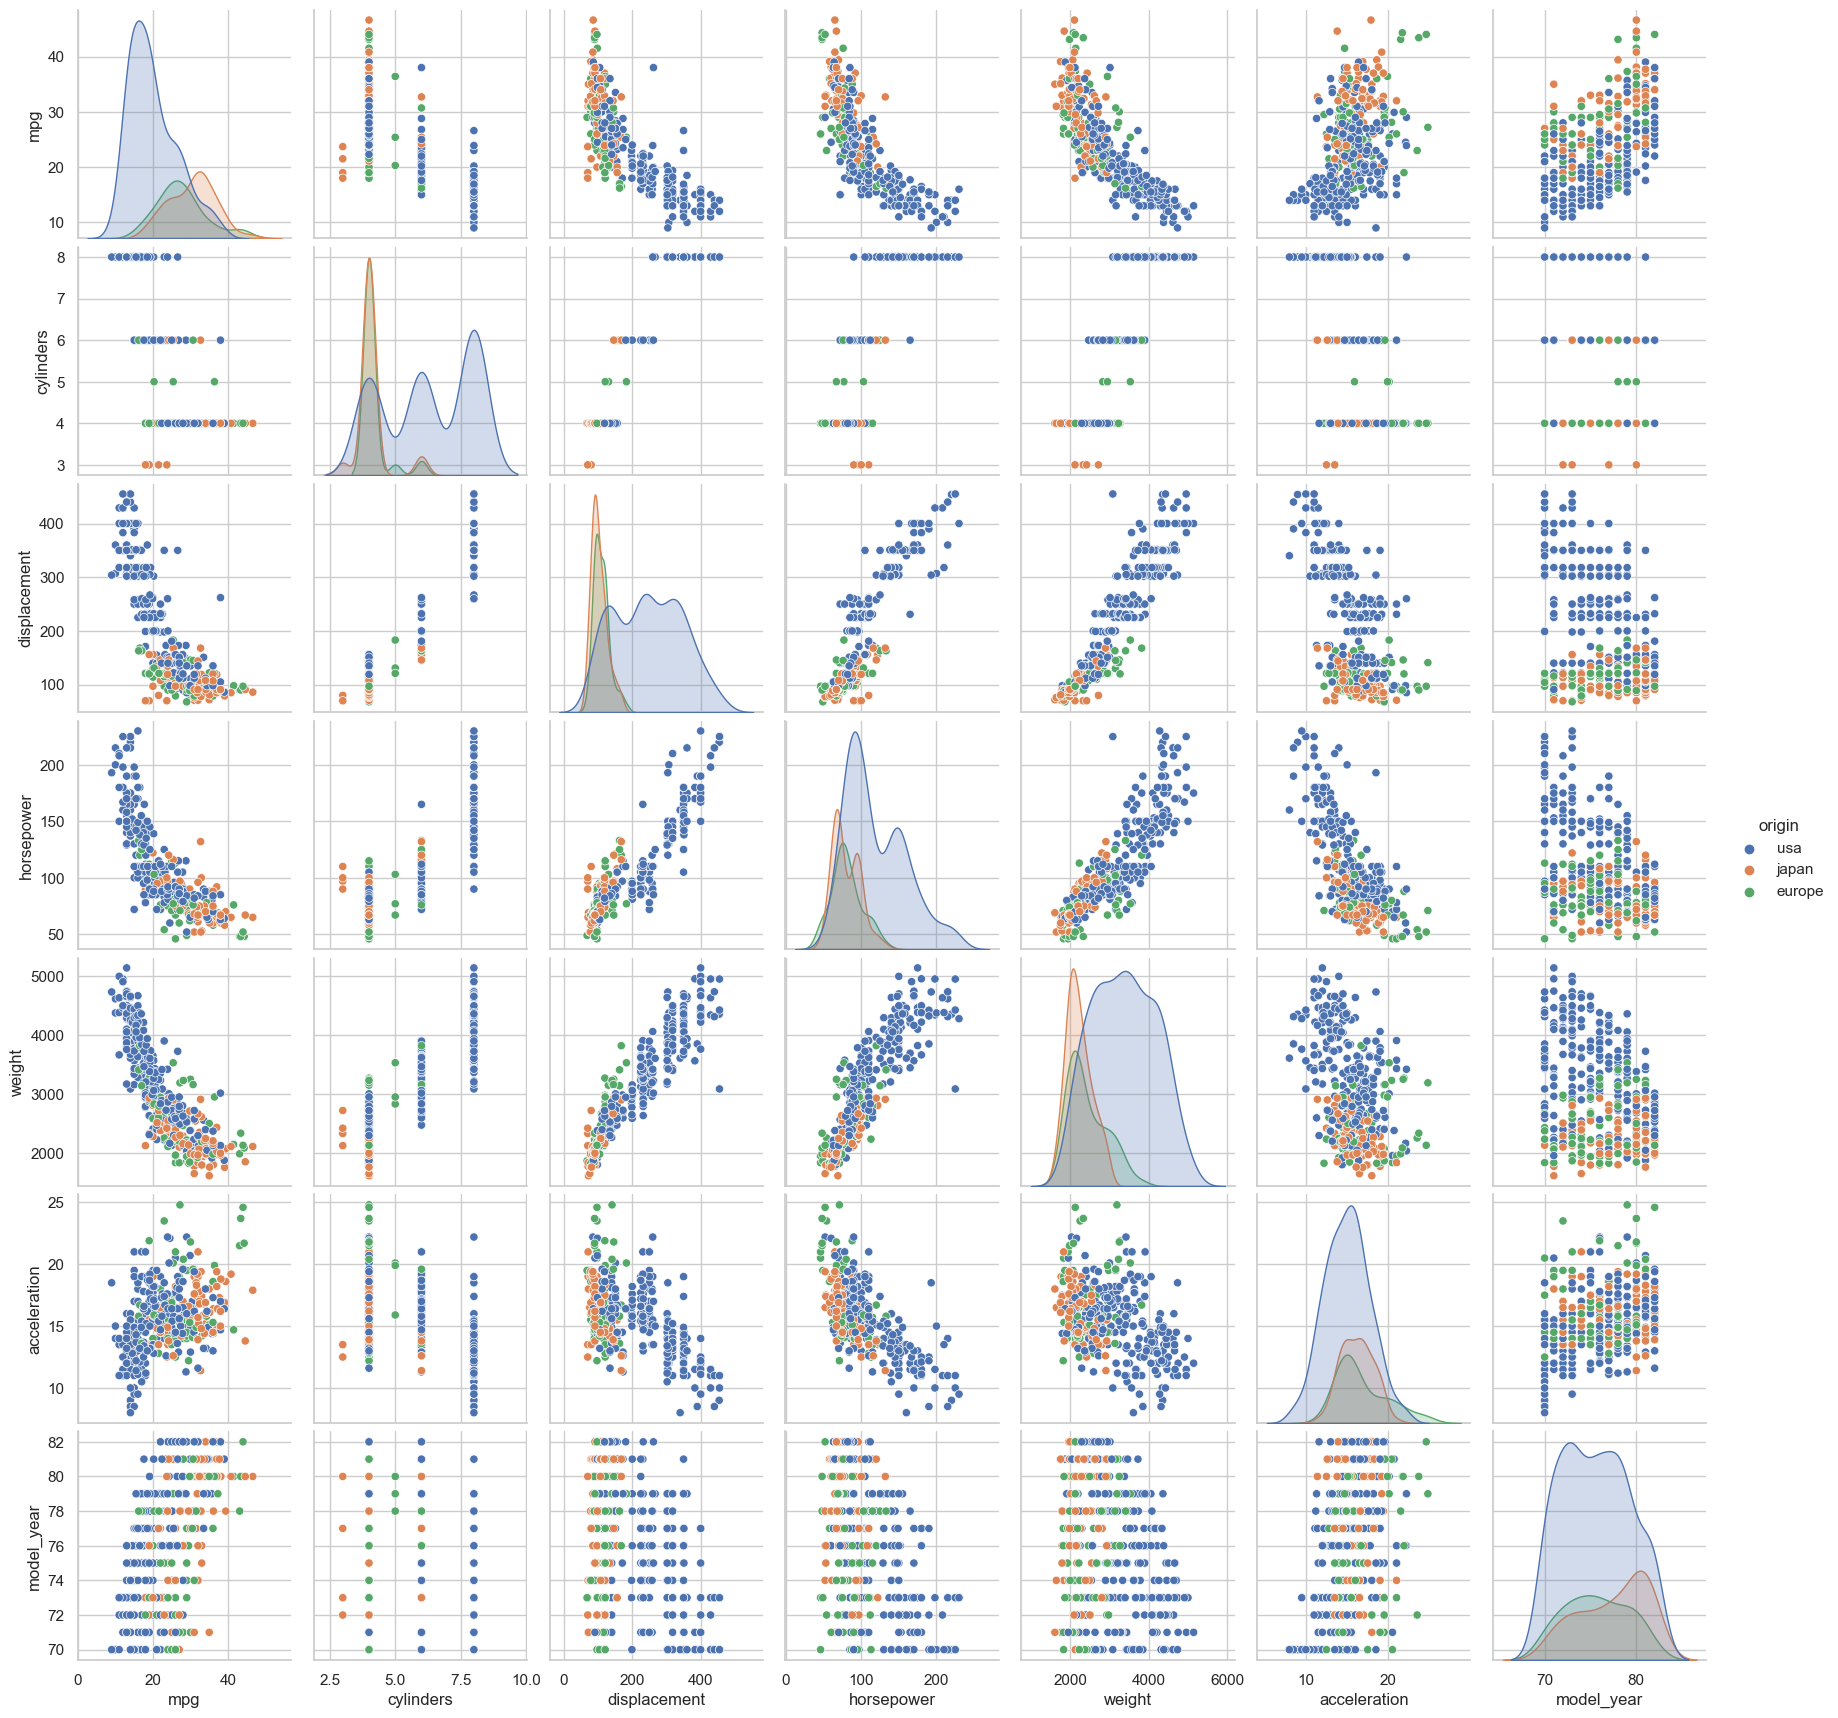

In [107]:
plt.figure(figsize=(3,3))
#without regression
sns.pairplot(cars, hue='origin', kind="scatter") # to understand the best set of features to explain a relationship between two variables
plt.show()

Above pairplot represents the relation between each variable in the dataset with their corresponding countries.
- mpg has negative correlation between displacement,horsepower and weight.

- acceleration and horsepower also have a negative correlation.

## Linear Regression
Linear regression is used to model the relationship between a dependent and one or more independent variables.

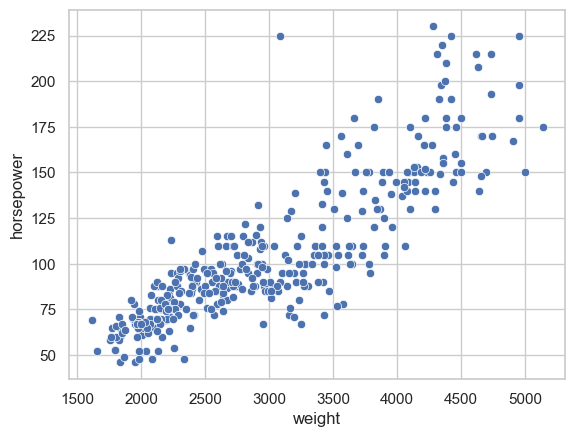

In [108]:
# scatter plot of horsepower versus weight
sns.scatterplot(data=cars,x='weight', y='horsepower')
plt.show()

### Do regression with state models OLS (Ordinary Least Squares)

Ordinary least squares (OLS) regression is a method that allow us to find a line that  describes the relationship between 1 or more predictor variables and a response variable.

In [109]:
model = ols('horsepower ~ weight', data=cars).fit() # Fit the linear regression model
print(model.summary()) # print the summary of the model

                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):          1.36e-118
Time:                        22:54:30   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1835      3.570     -3.412      0.0

- The model is a simple linear regression model with a dependent variable horsepower and the independent variabler is weight.

- The main aim of the model is to estimate the relationship between these two variables and to make predictions of horsepower based on the weight of the car. 

- The model used here is an ordinary least squares (OLS) regression model.

- R-squared value is a measure of the goodness of fit of the model and it ranges from 0 to 1. In this model the R-squared value is 0.747 means 74.7% of the variation in the dependent variable.




In [110]:
sample=scs.pearsonr(cars['horsepower'], cars['weight']) # correlation with spicy
print(sample)
ci = sample.confidence_interval() #  confidence interval range 
print(ci)


PearsonRResult(statistic=0.8645377375741445, pvalue=1.3643468773730233e-118)
ConfidenceInterval(low=0.8371778068279874, high=0.8875815463847679)


- The Pearson's correlation coefficient statistic of 0.8645 which is near to 1 so that it indicating a strong positive linear relationship between these two variables which represents the  weight of a car increases then the horsepower is also to increase.

- The p-value of 1.36e-118 is very small so this result indicates that there is a relationship between these two variables is statistically significant.

- The confidence interval is 0.837 to 0.887 so this high interval range confirms that there is a strong linear relationship between the two variables.

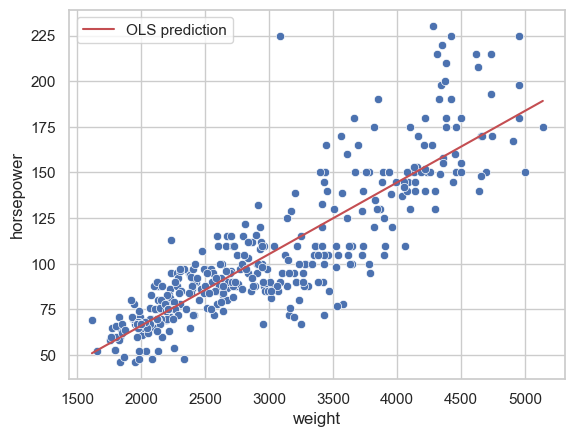

In [111]:
ypred = model.predict(cars['weight']) # in sample predection
scatterplot = sns.scatterplot(data=cars,x='weight', y='horsepower')
scatterplot.plot([cars['weight'].min(), cars['weight'].max()],
                  [ypred.min(), ypred.max()],
                  "r", label="OLS prediction")
scatterplot.legend(loc="best")
plt.show()


- Based on output the red line represents the predictions made by the linear regression model which is used to predict the horsepower based on the weight of the car.  
 

0    222.878630
1    340.409687
2    967.241993
dtype: float64


<AxesSubplot: xlabel='weight', ylabel='horsepower'>

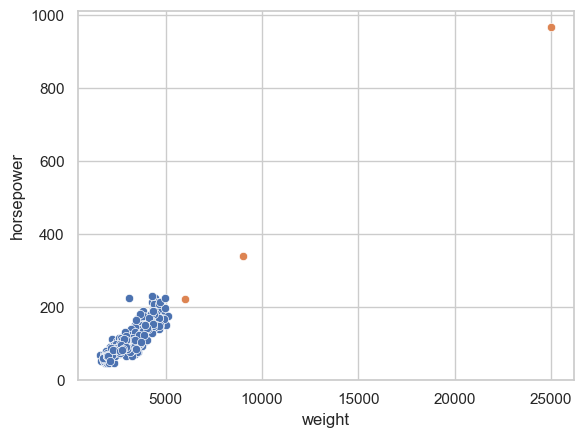

In [112]:
# out of sample prediction
scatterplot = sns.scatterplot(data=cars, x='weight', y='horsepower')

predictions = pd.DataFrame([6000,9000,25000], columns=['weight'])
ypred = model.predict(predictions)
print(ypred)
predictions['pred'] = ypred
sns.scatterplot(data = predictions, x = 'weight',y = 'pred')


- Here i took three different values for weight (6000, 9000, and 25000) to make predictions for the corresponding horsepower values.

- Even the samples are out of the data the result shows there is an increase in horsepower with increase in weight of the car.

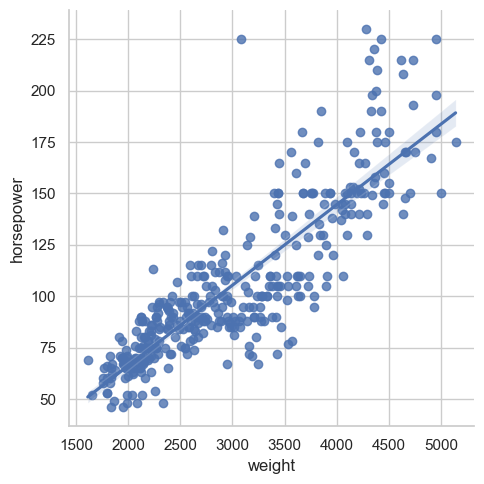

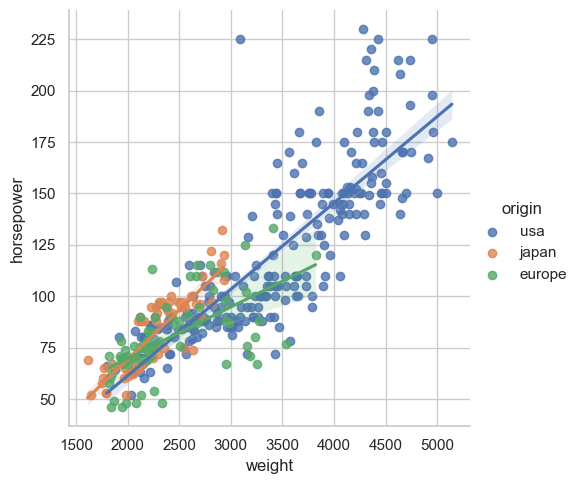

In [113]:
# Show the results of a linear regression

sns.lmplot(data=cars,x='weight', y='horsepower')
sns.lmplot(data=cars,x='weight', y='horsepower', hue='origin')


Considering some samples to predect the model

In [114]:
cars = cars.sample(30) # take some sample
model = ols('horsepower ~ weight', data=cars).fit() # Fit the linear regression model
print(model.summary()) # print the summary of the model


                            OLS Regression Results                            
Dep. Variable:             horsepower   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     115.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.93e-11
Time:                        22:54:37   Log-Likelihood:                -127.03
No. Observations:                  30   AIC:                             258.1
Df Residuals:                      28   BIC:                             260.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5426     11.297     -1.376      0.1

- Here we took some samples to predect the model.

- In this model the R-squared value is 0.871 means 87.1% of the variation in the dependent variable horsepower .

- The p-value for the independent variable weight is less than 0.001 which shows a relationship between weight and horsepower is statistically important.

- So the result shows there is is a strong linear relationship between horsepower and weight.


In [115]:
sample=scs.pearsonr(cars['horsepower'], cars['weight']) # correlation with spicy
print(sample)

PearsonRResult(statistic=0.8971011816478304, pvalue=1.9284448840343314e-11)



- The Pearson's correlation coefficient statistic = 0.9334 which is near to 1 so that it indicating a strong positive correlation between these two variables.

- The p-value is 5.471e-14 is less than a significance level (alpha=  0.05) indicating that the correlation is statistically significant.

- So we can conclude that there is a strong positive relationship between horsepower and weight.

In [116]:
sample.confidence_interval() #  confidence interval range 

ConfidenceInterval(low=0.7931890208159476, high=0.9502511764833373)

- The confidence interval is 0.844 to 0.963 so this high interval range confirms that there is a strong linear relationship between the two variables.

### Prediction interval in sample prediction

In [117]:
# use model to make predections on the data 
predictions = model.get_prediction(cars['weight']) # predict the model in the sample

frame=predictions.summary_frame(alpha=0.05) # with confidence interval 95%
ypred=frame['mean'] # predict the mean value of the weight

frame[['obs_ci_lower','obs_ci_upper']] # range of 30 samples

,obs_ci_lower,obs_ci_upper
0,132.193696,208.900430
1,143.376696,221.788339
2,66.223688,138.202062
3,74.376647,146.442911
4,49.998559,122.199364
5,64.824942,136.801865
6,58.204217,130.227575
7,85.520786,157.930224
8,27.562246,100.892201
9,36.025639,108.822616


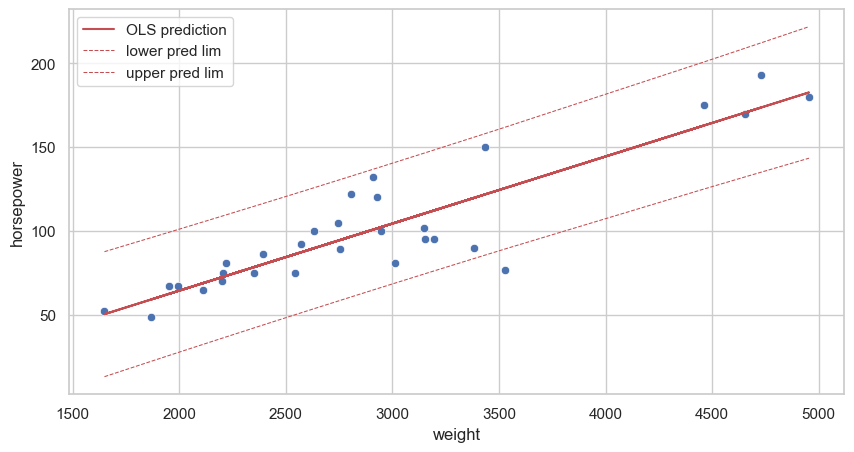

In [118]:
order = np.argsort(cars['weight'])
xs = np.array(cars['weight'])[order]

# set the size of figure
fig, ax = plt.subplots(figsize=(10,5))

# scatterplot on weight vs horsepower
sns.scatterplot(data=cars, x='weight', y='horsepower')
ax.plot(cars['weight'], ypred, "r", label="OLS prediction") 

order = np.argsort(cars['weight'])
x = np.array(cars['weight'])[order]
# prediction limits
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

# legend
ax.legend(loc="best")
plt.show()


- The Output graph shows the scatterplot between horsepower and weight for 30 randomly selected cars from tha data.

- Based on output the regression line slopes upward so it indicating a positive relationship between weight and horsepower.

- The regression model provides a good fit for the data as the OLS regression line passes close to the majority of the data points, indicating a high degree of correlation between "weight" and "horsepower".

- With the 95% confidence interval in the OLS regression predictions showing that for any given weight there is a 95% chance  of horsepower is within the interval bounded by the lower and upper prediction limits.

- Overall the output suggests that the OLS regression model provides a valid representation of the relationship between weight and horsepower in the data.

### Prediction interval out of sample prediction

           weight
0        0.000000
1      151.057402
2      302.114804
3      453.172205
4      604.229607
..            ...
327  49395.770393
328  49546.827795
329  49697.885196
330  49848.942598
331  50000.000000

[332 rows x 1 columns]


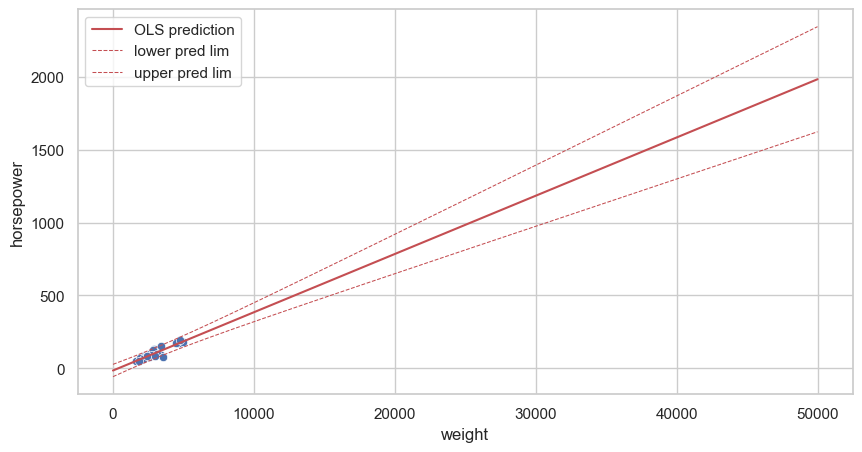

In [119]:

# use model to make predections that out of the sample
xs = pd.DataFrame(np.linspace(0,50000,332), columns=['weight'])# predict the model out of the sample
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

# prediction limits
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

# set the size of figure
fig, ax = plt.subplots(figsize=(10,5))
# plot the scatterplot and the regression line
sns.scatterplot(data=cars, x='weight', y='horsepower')
ax.plot(xs, ypred, "r", label="OLS prediction")
ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)

# legend
ax.legend(loc="best")
plt.show()

- The output of the graph shows the relationship between horsepower and weight for 30 randomly selected cars from the data and red line represents the prediction of horsepower based on weight made by OLS regression model where as red dotted lines on both side of the prediction line represent the upper and lower prediction limits with a 95% confidence level.

- The overall output of the prediction line shows a positive relationship between weight and horsepower in the data. So the graph shows as weight increases, the horsepower of the cars also to increase and it means there is a range of possible values for the horsepower based on weight.




